# Functies

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser, relativedelta

# hip to origin, recalculate all other points with that translation
def x_translation (x_ver, row):
    x_ch = row['x']
    x_n = x_ch - x_ver
    return  x_n

def z_translation (z_ver, row):
    z_ch = row['z']
    z_n = z_ch - z_ver
    return z_n

# calculate arc that the body needs to rotate to get both hips on the same z-coordinate
def define_arc(frame):
    x_right = float(frame.loc[frame['jointName'] == "HipRight", 'x_schuif'])
    x_left = float(frame.loc[frame['jointName'] == "HipLeft", 'x_schuif'])
    z_right = float(frame.loc[frame['jointName'] == "HipRight", 'z_schuif'])
    z_left = float(frame.loc[frame['jointName'] == "HipLeft", 'z_schuif'])
    
    arc = math.atan(abs(z_right-z_left)/abs(x_right-x_left))
    return arc

# rotate a given point and calculate new x and new z
def rotate_body_x(row, arc):
    new_x = (math.cos(arc) * float(row['x_schuif'])) + (math.sin(arc) * float(row['z_schuif']))
    return new_x

def rotate_body_z(row, arc):
    new_z = (math.cos(arc) * float(row['z_schuif'])) - (math.sin(arc) * float(row['x_schuif'])) 
    return new_z


################
# Calculate arc
################

def arc_elbow(frame, side):
    spineShoulder = np.matrix([[float(frame.loc[frame['jointName'] == 'SpineShoulder', 'x_rotated'])], 
                               [float(frame.loc[frame['jointName'] == 'SpineShoulder', 'y'])]])
    spineMid = np.matrix([[float(frame.loc[frame['jointName'] == 'SpineMid', 'x_rotated'])], 
                               [float(frame.loc[frame['jointName'] == 'SpineMid', 'y'])]])
    
    spineMid_new = spineMid - spineShoulder
    
    if side == 'r':
        # right side
        jointName_shoulder = "ShoulderRight"
        jointName_elbow = "ElbowRight"
    else:
        # left side
        jointName_shoulder = "ShoulderLeft"
        jointName_elbow = "ElbowLeft"
    
    shoulder = np.matrix([[float(frame.loc[frame['jointName'] == jointName_shoulder, 'x_rotated'])], 
                        [float(frame.loc[frame['jointName'] == jointName_shoulder, 'y'])]])
    elbow = np.matrix([[float(frame.loc[frame['jointName'] == jointName_elbow, 'x_rotated'])], 
                        [float(frame.loc[frame['jointName'] == jointName_elbow, 'y'])]])

    elbow_new = elbow - shoulder

    sum_vectors = np.dot(np.transpose(spineMid_new), elbow_new)
    multiplication_lengths = np.linalg.norm(spineMid_new) * np.linalg.norm(elbow_new)

    cos_alpha = sum_vectors / multiplication_lengths
    alpha = np.arccos(cos_alpha) * 180 / math.pi
    return alpha

def arc_elbow_sagittal(frame, side):
    rightShoulder = np.matrix([[float(frame.loc[frame['jointName'] == 'ShoulderRight' , 'x_rotated'])],
                              [float(frame.loc[frame['jointName'] == 'ShoulderRight', 'z_rotated'])]])
    leftShoulder = np.matrix([[float(frame.loc[frame['jointName'] == 'ShoulderLeft', 'x_rotated'])], 
                             [float(frame.loc[frame['jointName'] == 'ShoulderLeft', 'z_rotated'])]])
    if side == 'r':
        #right side
        shouldersVector =   rightShoulder - leftShoulder
        jointNameShoulder = "ShoulderRight"
        jointNameElbow = "ElbowRight"
    else:
        #left side
        shouldersVector =  leftShoulder - rightShoulder
        jointNameShoulder = "ShoulderLeft"
        jointNameElbow = "ElbowLeft"
    
    elbow = np.matrix([[float(frame.loc[frame['jointName'] == jointNameElbow, 'x_rotated'])],
                     [float(frame.loc[frame['jointName'] == jointNameElbow, 'z_rotated'])]])
    shoulder = np.matrix([[float(frame.loc[frame['jointName'] == jointNameShoulder, 'x_rotated'])],
                     [float(frame.loc[frame['jointName'] == jointNameShoulder, 'z_rotated'])]])
        
    if side == 'r':
        elbowVector = elbow - leftShoulder
    else:
        elbowVector = elbow - rightShoulder
        
    #calculate angle between vectors: Shoulder->Shoulder and Shoulder->elbow
    beta = (math.atan2(elbowVector[0], elbowVector[1]) - math.atan2(shouldersVector[0], shouldersVector[1])) * 180 / math.pi
    
    #correct angle if Shoulder->Shoulder vector is negative
    if math.atan2(shouldersVector[0], shouldersVector[1]) < 0:
        beta = beta*-1
    
    return beta

def relative_time(row, frame):
    index = frame.index.get_loc(row.name)
    
    if index == 0:
        return 0
    
    first_row = frame.iloc[0]
    time1 = row['time']
    time2 = first_row['time']
    
    dt1 = parser.parse(time1)
    dt2 = parser.parse(time2)
    delta = relativedelta.relativedelta(dt1, dt2)
    microseconds = delta.seconds * 1000000 + delta.microseconds
    return microseconds

def normalized_time(row, frame):
    total_time = frame['relativeTime'].max()
    
    relative_time = row['relativeTime']
    normalized = relative_time/total_time
    return normalized

# Berekenen

1


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

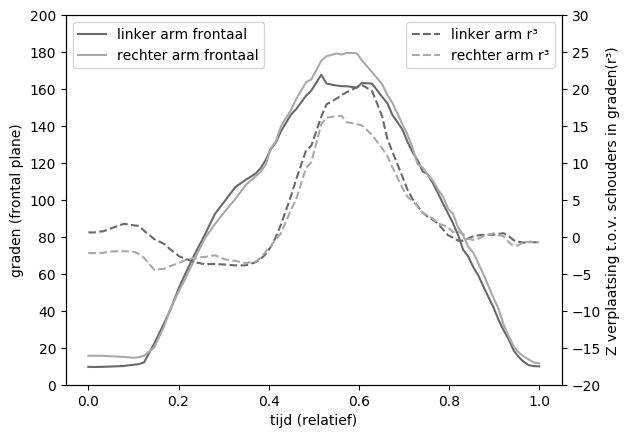

2


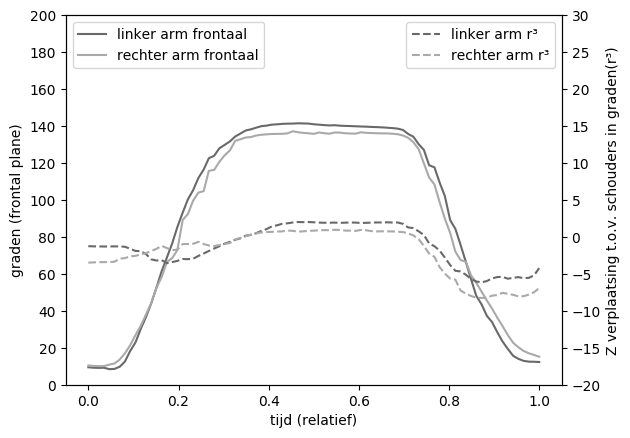

3


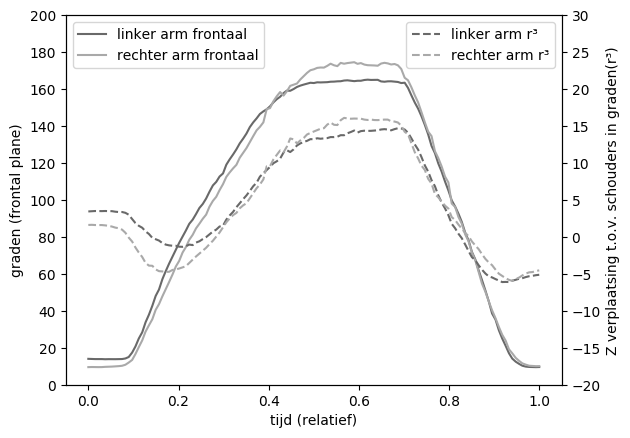

4


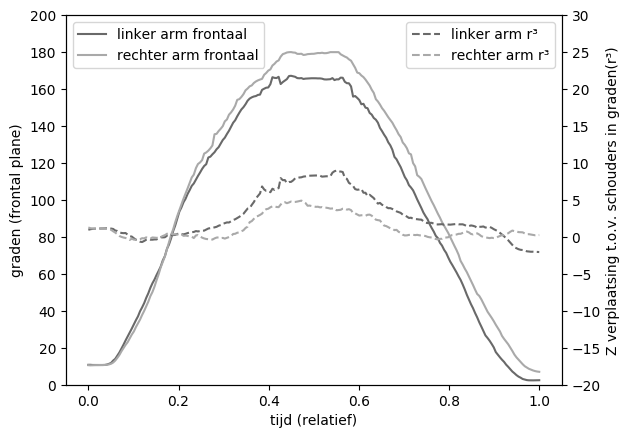

5


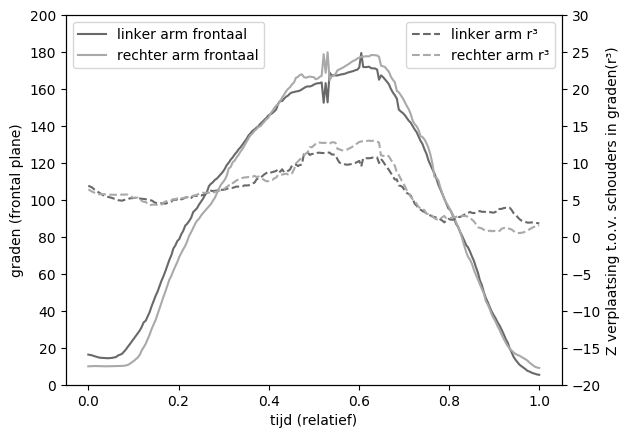

6


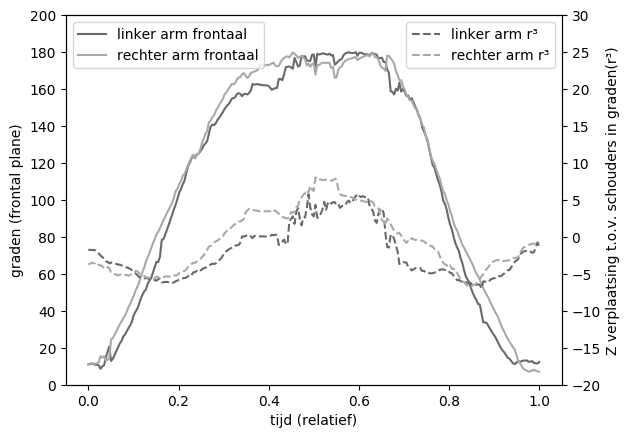

7


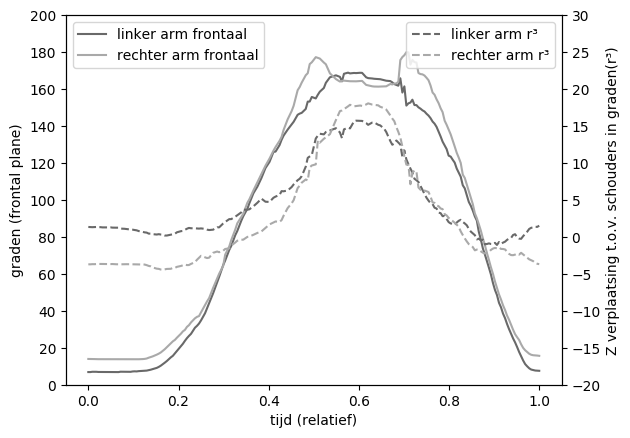

8


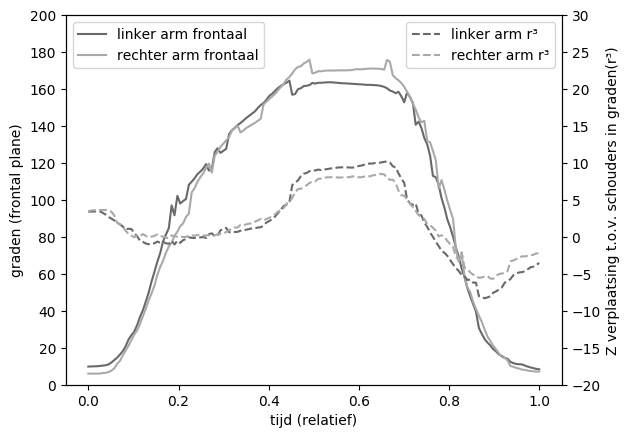

9


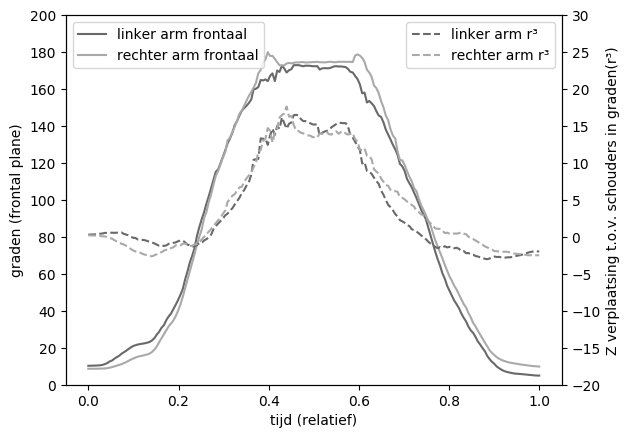

10
BUG1
745
Person not found
11


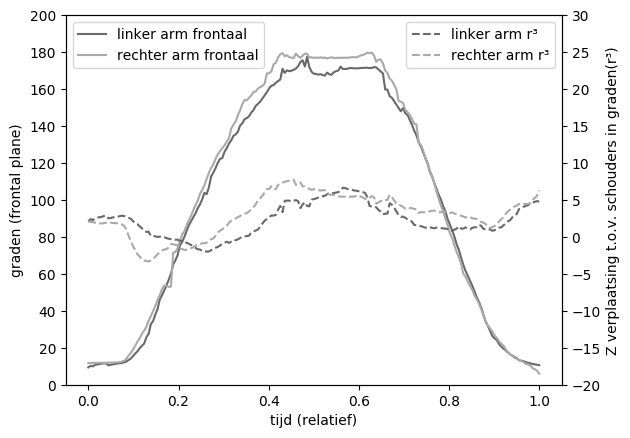

12


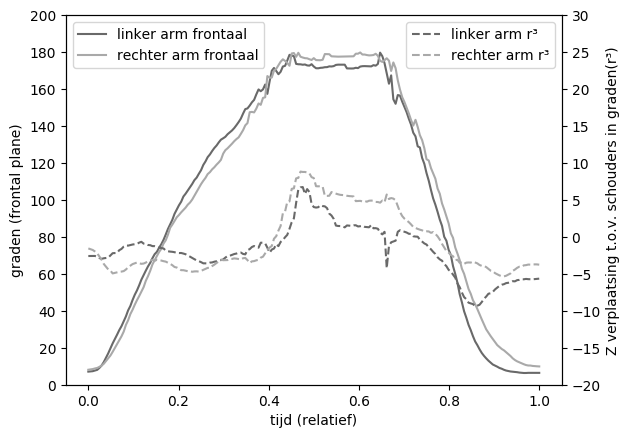

13


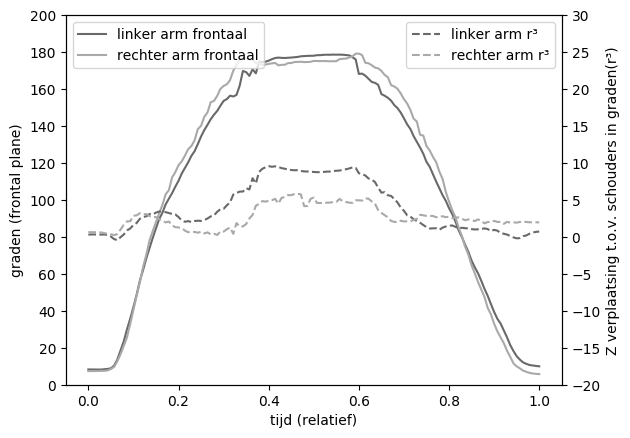

14


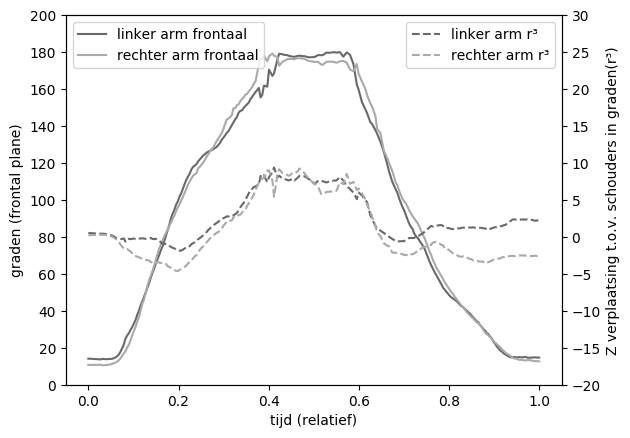

15


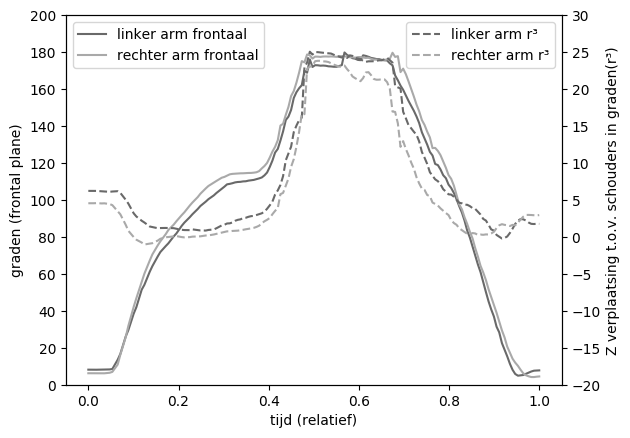

16


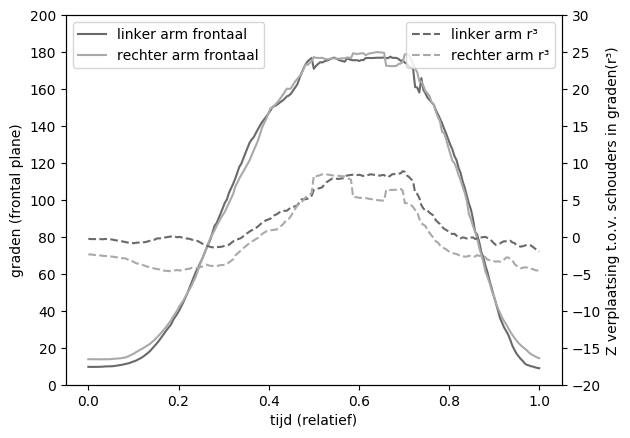

17


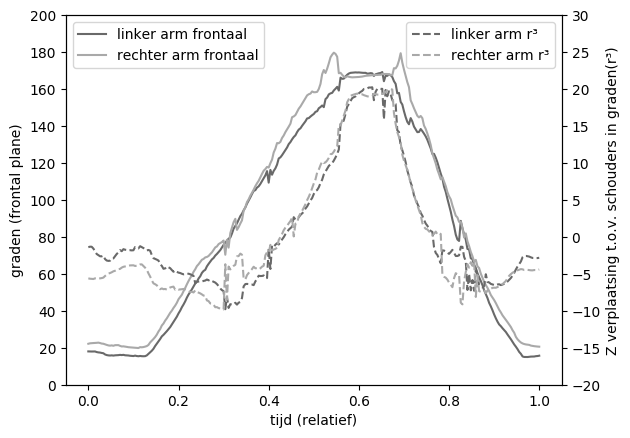

18


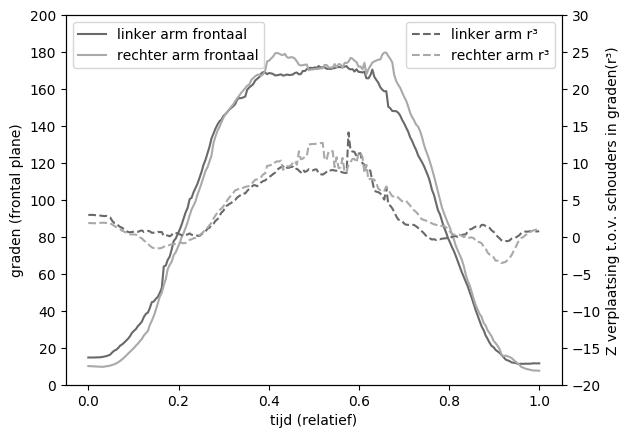

19


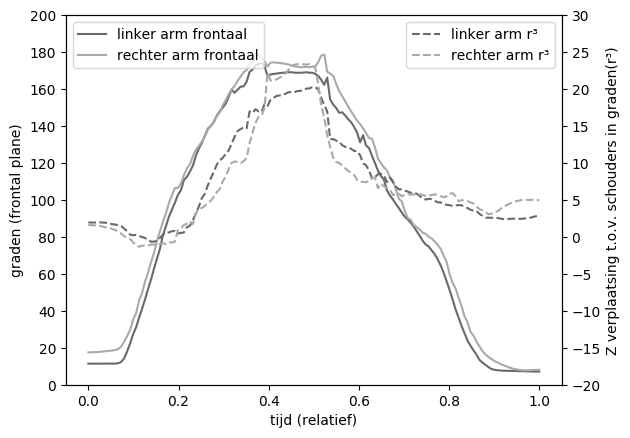

20


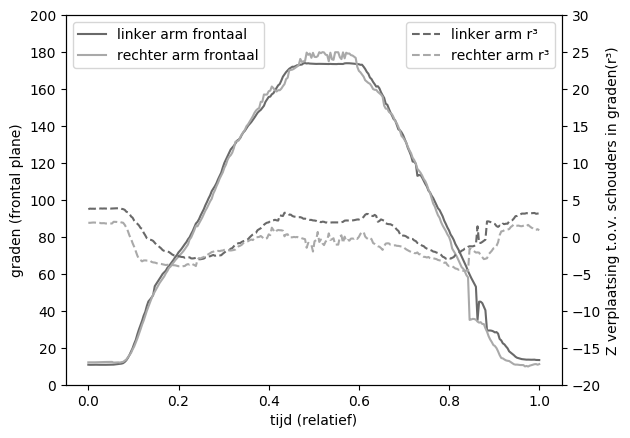

21
BUG1
557
Person not found
22


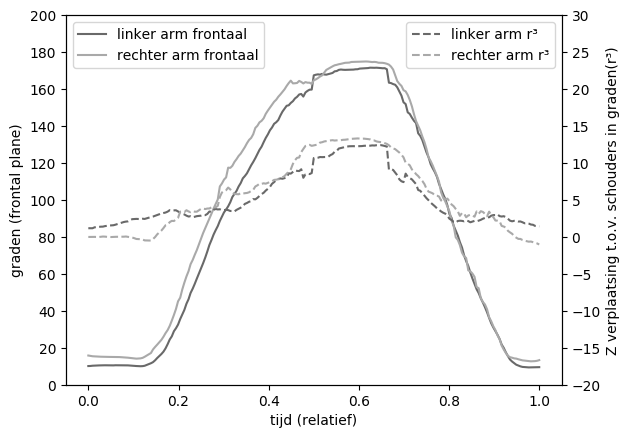

23
BUG1
499
Person not found
24


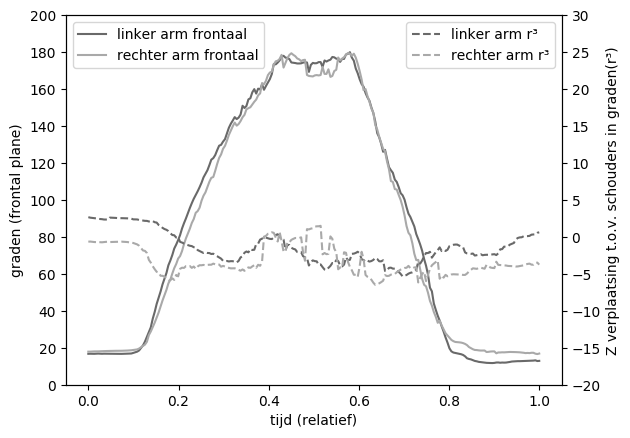

25


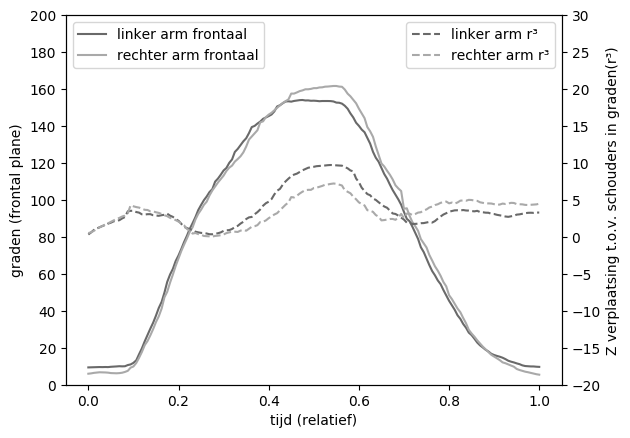

26


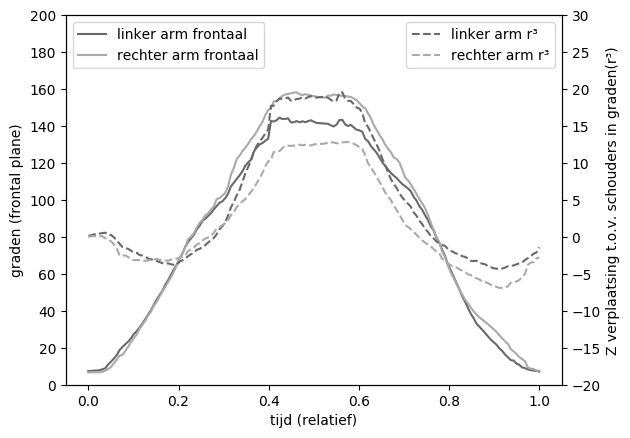

27


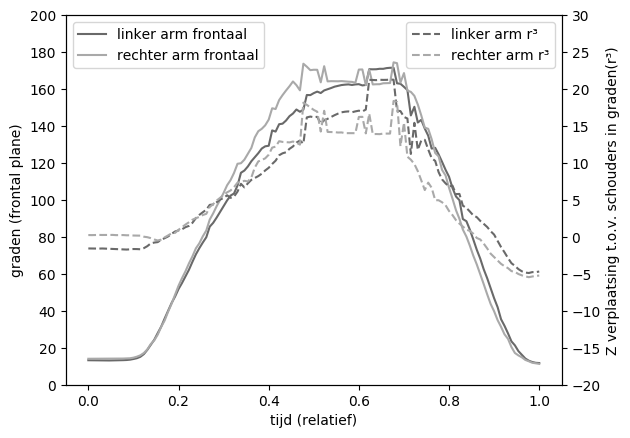

28


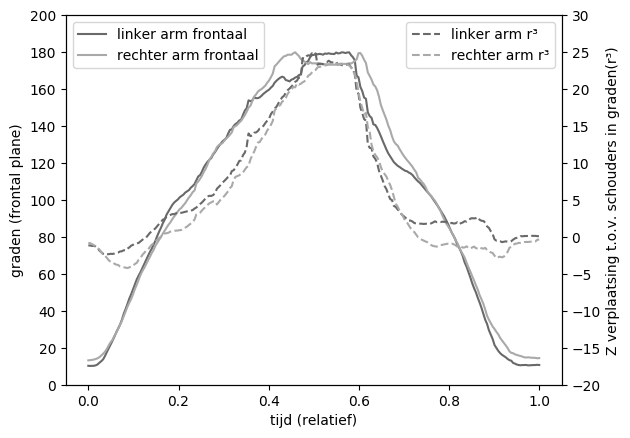

29


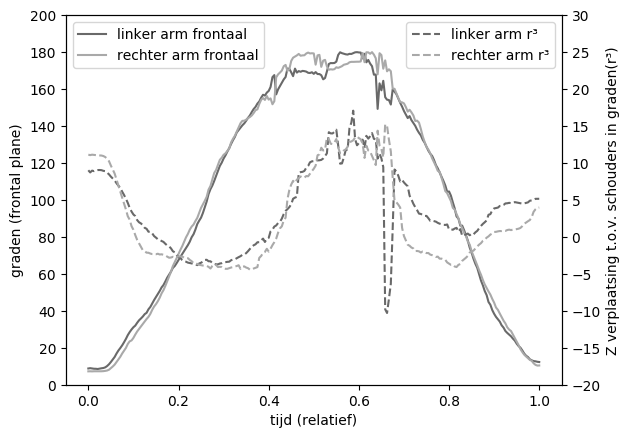

30


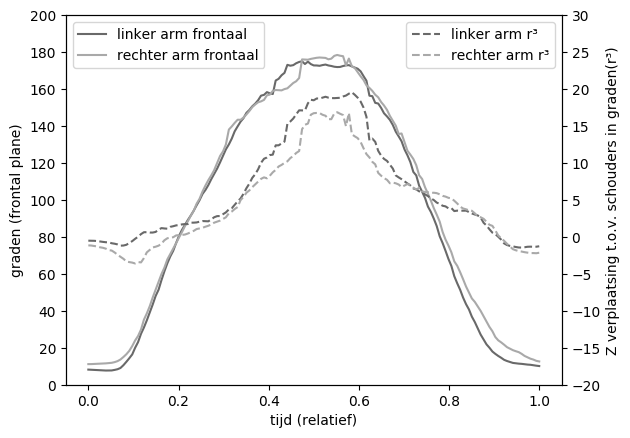

31


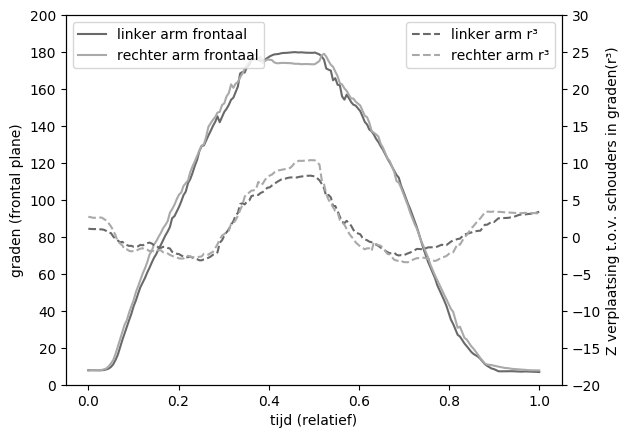

32


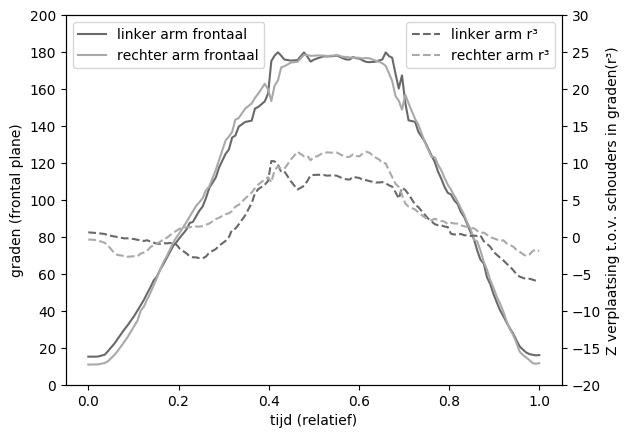

33


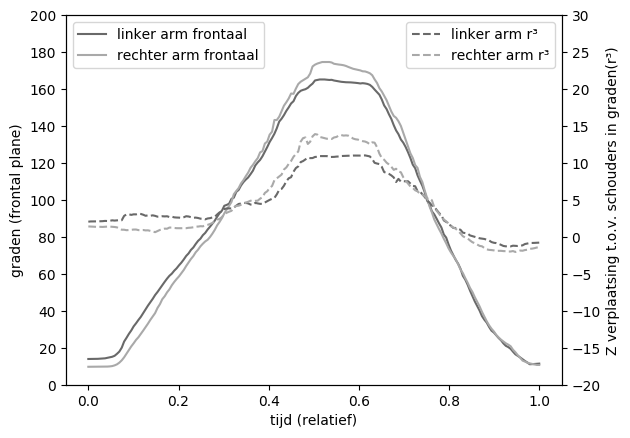

34


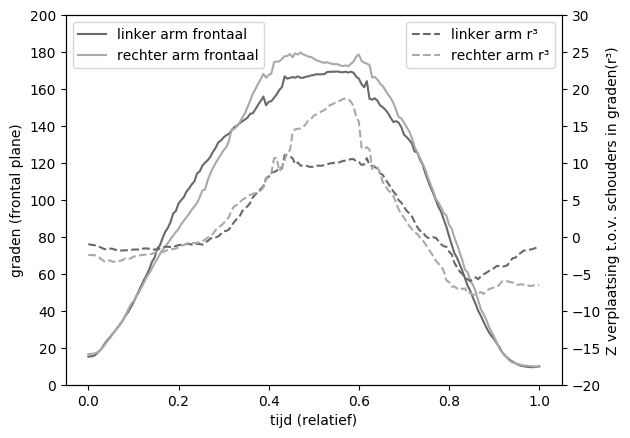

35


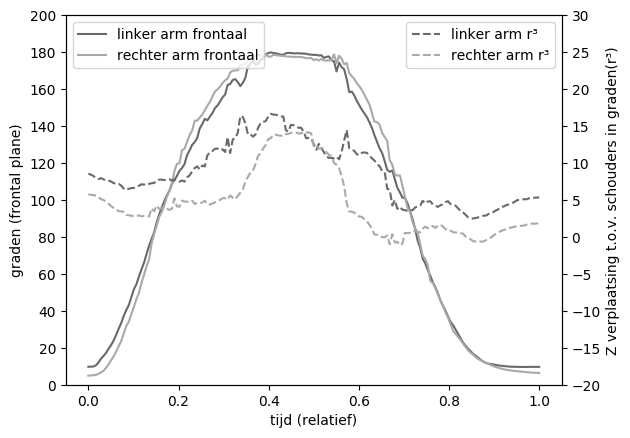

36


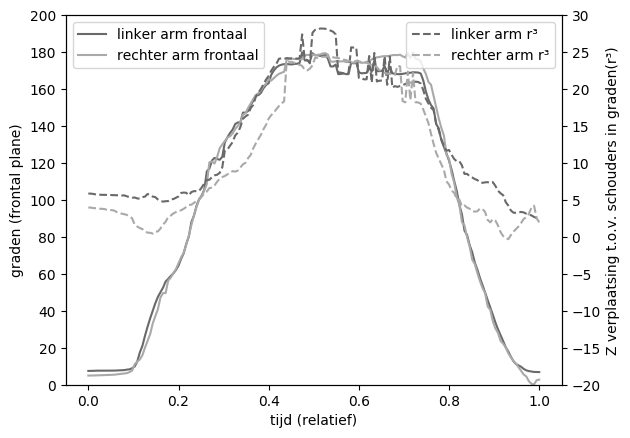

37


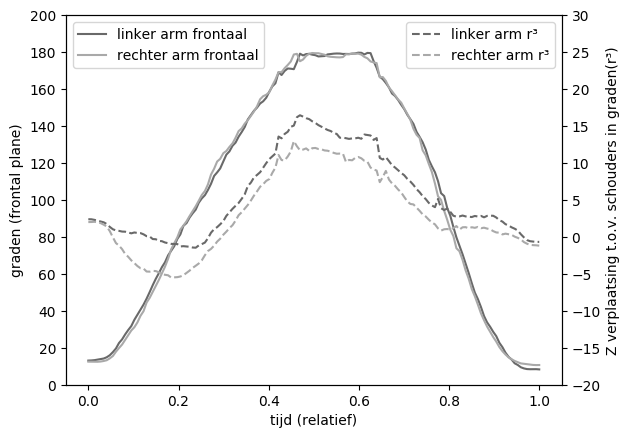

38
BUG1
631
Person not found
39


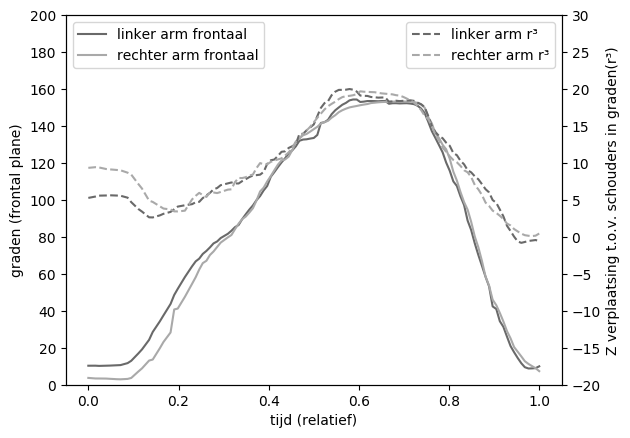

40


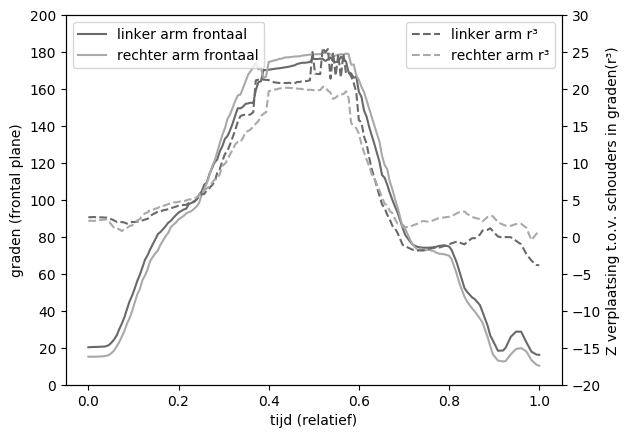

41


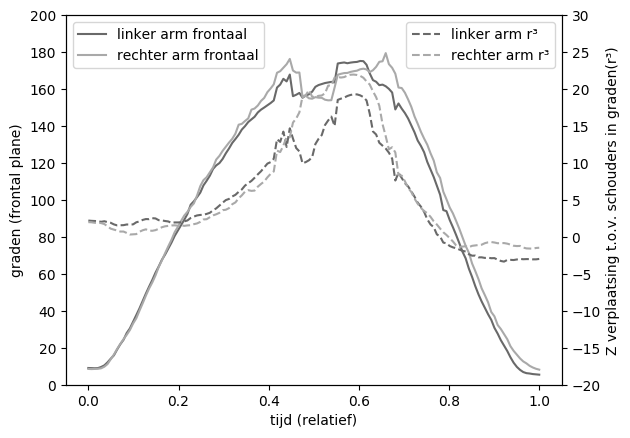

42


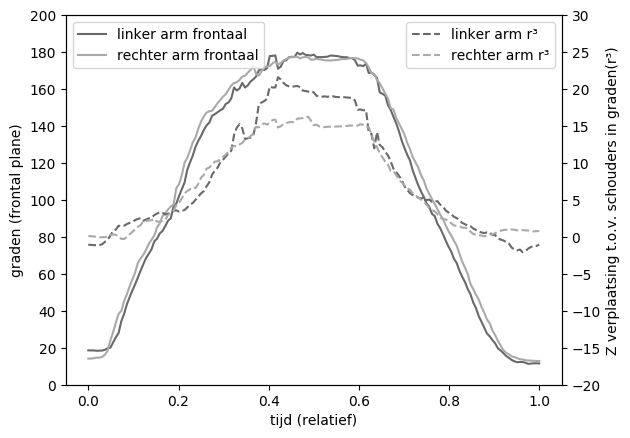

43
BUG1
556
Person not found
44


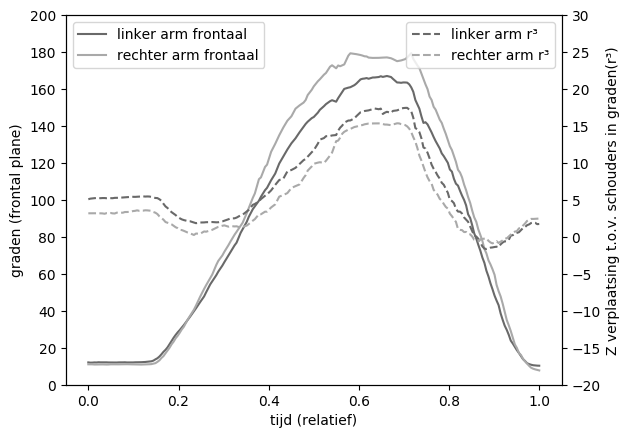

45


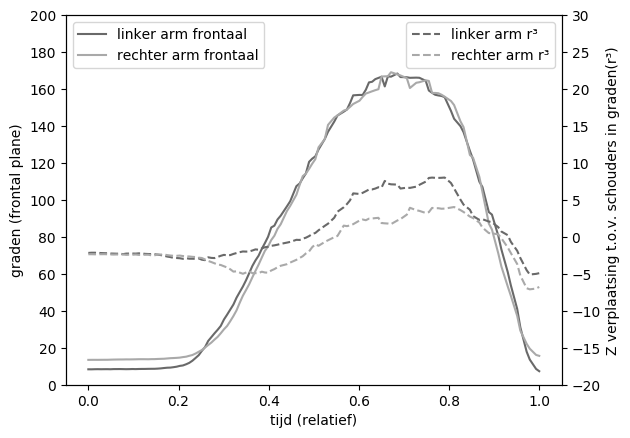

46


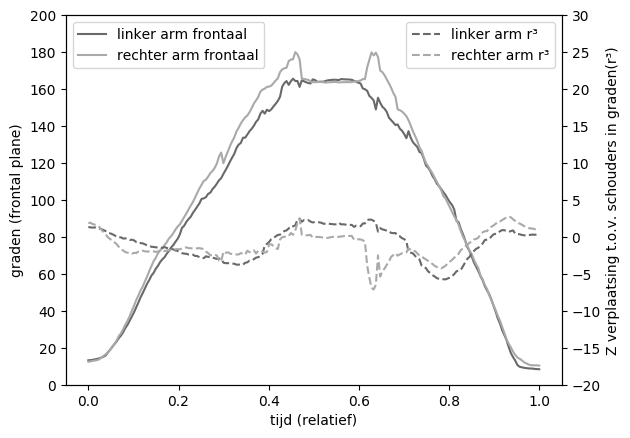

47


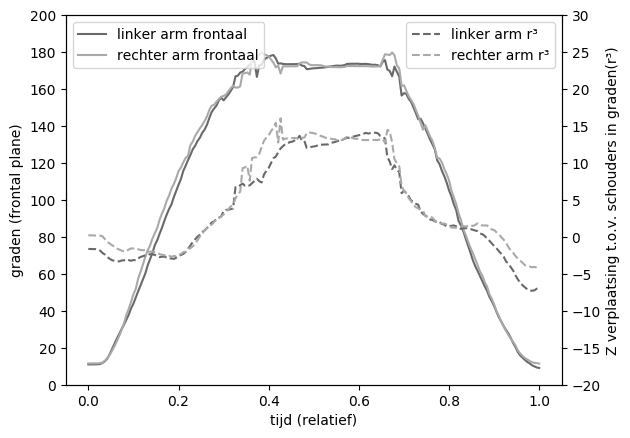

48


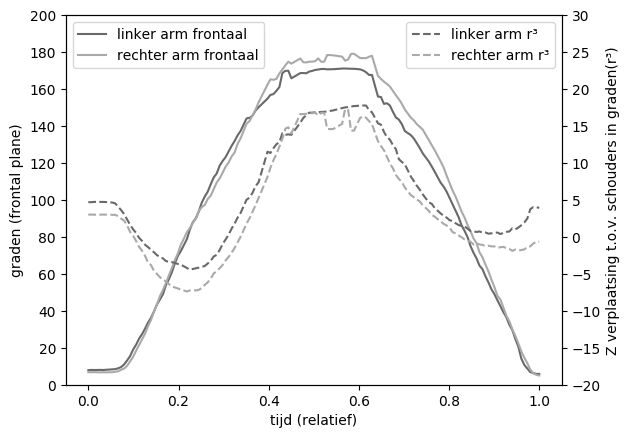

49


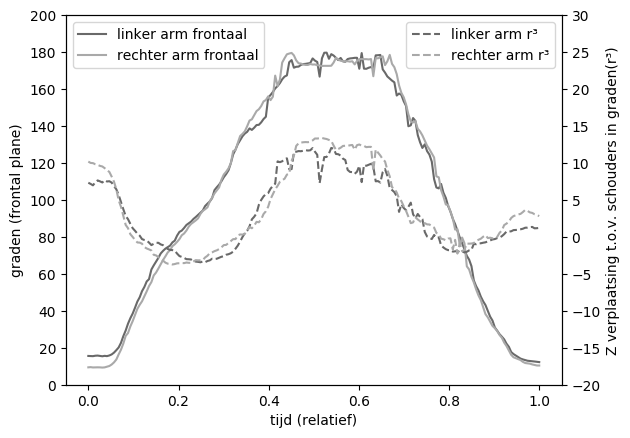

50


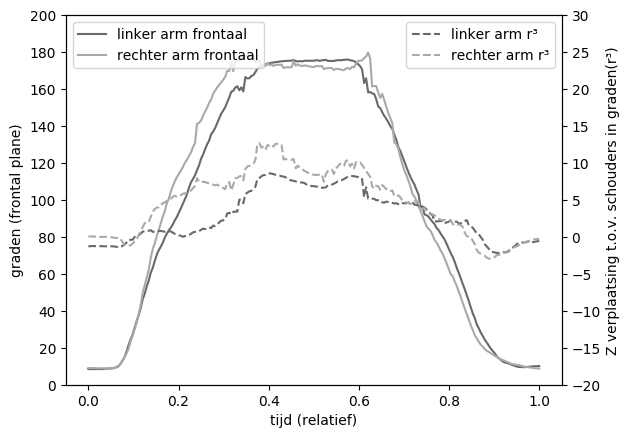

51


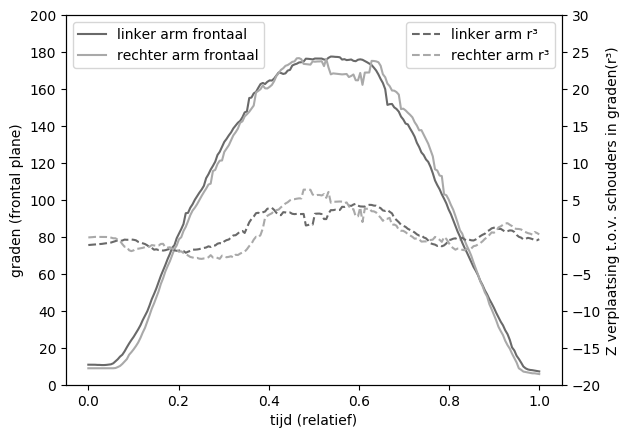

52


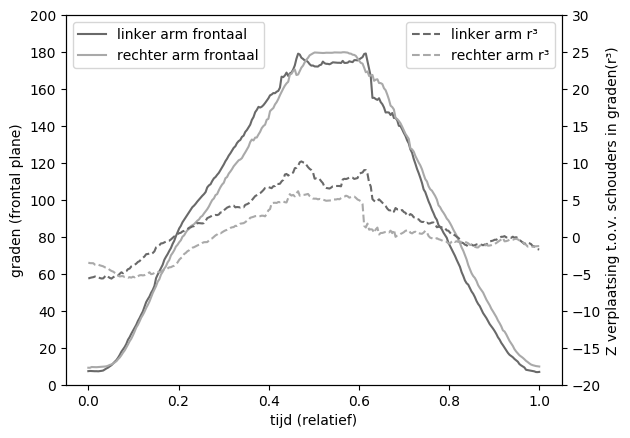

53


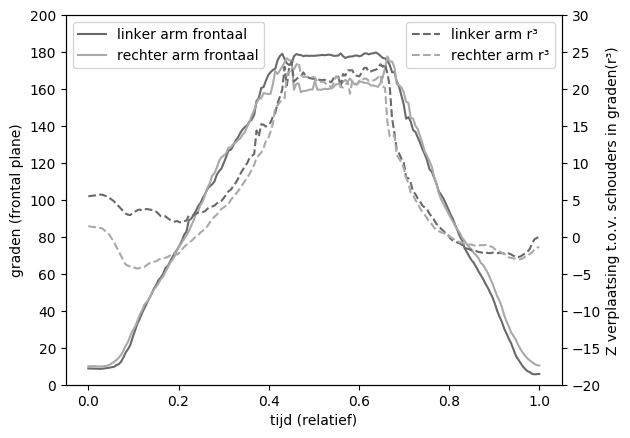

54


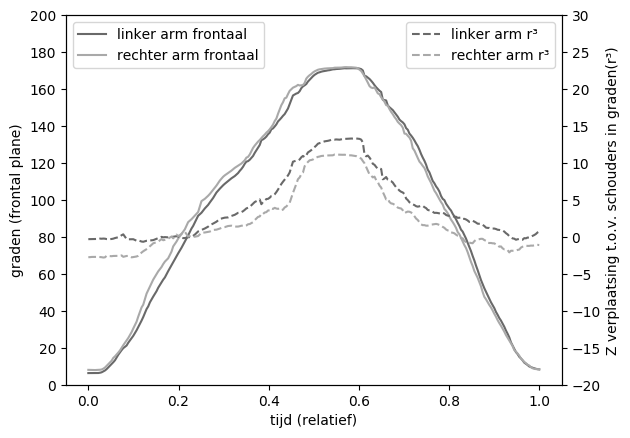

55


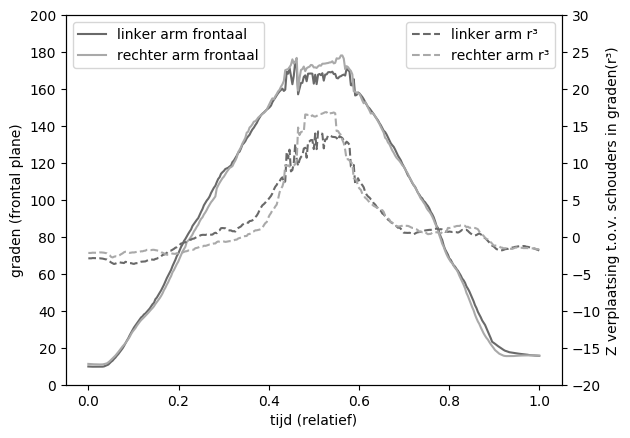

56


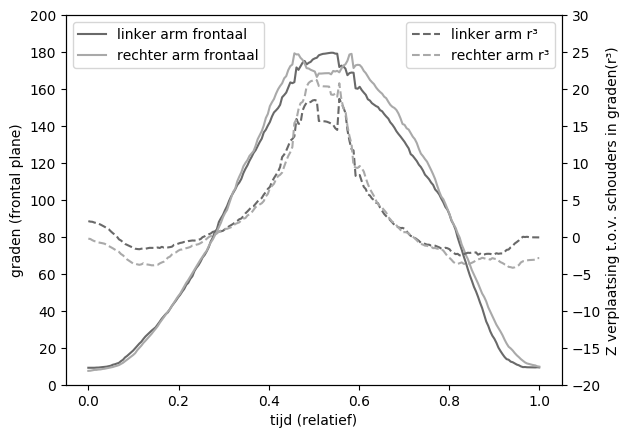

57


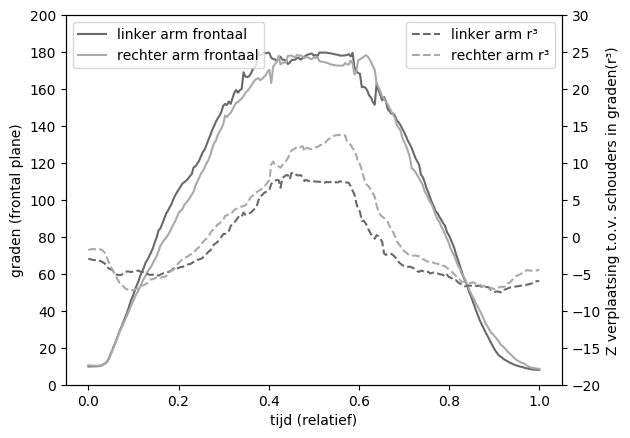

58


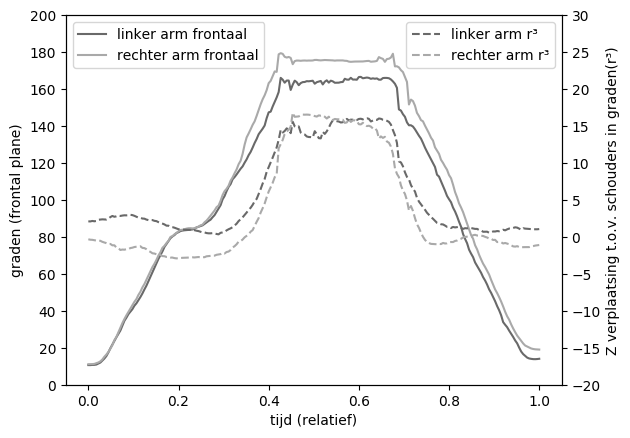

59


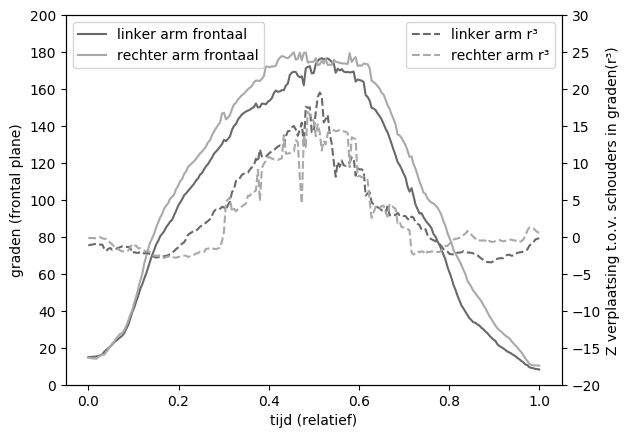

60


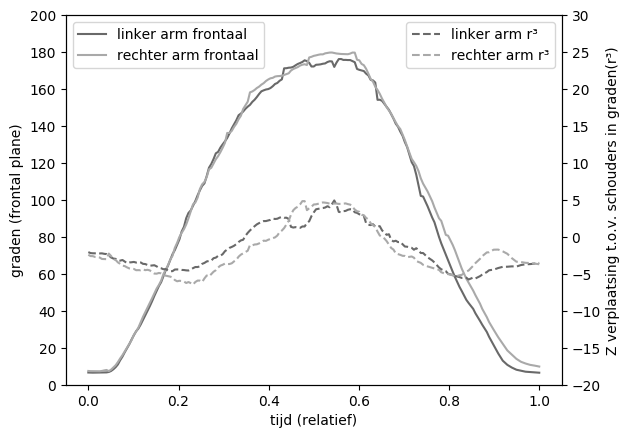

61


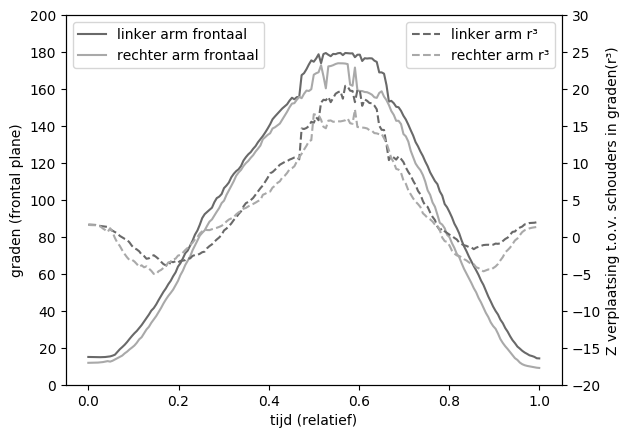

In [2]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# import data 
df = pd.read_csv('../csv/cleanedData.csv')  #('combined_P1-5_E1.csv')    # ('/data/pepper/combined.csv')

for person in range(1, 62):
    print(str(person))
    # gets data from 1 person
    one_e = df.loc[df['pNum'] == person]
    
    ###################
    # ROTATE BODY
    ###################
    # create empty DataFrame
    index = np.arange(0)
    frames = pd.DataFrame(index=index)
    frames = frames.fillna(0) # with 0s rather than NaNs

    # get min and max frameNum
    frame_max = int(one_e['frameNum'].max())
    frame_min = int(one_e['frameNum'].min())

    found = True
    
    for i in range(frame_min, frame_max + 1):
        if found:
            frame = one_e.loc[one_e['frameNum'] == i]
        
            try:
                x_ver = float(frame.loc[frame['jointName'] == "HipRight", 'x'])
                z_ver = float(frame.loc[frame['jointName'] == "HipRight", 'z'])
            
                # schuiven
                frame['x_schuif'] = frame.apply (lambda row: x_translation(x_ver, row),axis=1)
                frame['z_schuif'] = frame.apply (lambda row: z_translation(z_ver, row),axis=1)

                #draaien
                arc = define_arc(frame)
                frame['x_rotated'] = frame.apply (lambda row: rotate_body_x(row, arc),axis=1)
                frame['z_rotated'] = frame.apply (lambda row: rotate_body_z(row, arc),axis=1)

                #samenvoegen
                # all frames from one person are rotated
                frames = frames.append(frame)
            except:
                found = False
                print('BUG1')
                print(i)
        

    ###################
    # CALCULATE ARCS
    ###################
    if found == True:
        # create empty DataFrame
        index = np.arange(0)
        columns = ['pNum', 'eNum', 'frameNum', 'time', 'arc_right', 'arc_left']
        arcs = pd.DataFrame(index=index, columns=columns)
        arcs = arcs.fillna(0) # with 0s rather than NaNs

        frame_max_2 = frames['frameNum'].max()
        frame_min_2 = frames['frameNum'].min()

        initialZValueElbowLeft = float(frames.loc[frames['frameNum'] == frame_min_2].loc[frames.loc[frames['frameNum'] == frame_min_2]['jointName'] == "ElbowLeft", 'z_rotated'])
        initialZValueElbowRight = float(frames.loc[frames['frameNum'] == frame_min_2].loc[frames.loc[frames['frameNum'] == frame_min_2]['jointName'] == "ElbowRight", 'z_rotated'])

        for i in range(frame_min_2, frame_max_2 + 1): 
            frame = frames.loc[frames['frameNum'] == i]
            right_arc = arc_elbow(frame, 'r')
            right_sagittal_arc = arc_elbow_sagittal(frame, 'r')
            left_arc = arc_elbow(frame, 'l')
            left_sagittal_arc = arc_elbow_sagittal(frame, 'l')
            time = frame.loc[frame['jointName'] == 'SpineBase', 'time']
            time = time[time.first_valid_index()]
            #row = {'pNum': person, 'eNum': person, 'frameNum': i, 'time': time, 'arc_right': right_arc[0,0], 'arc_left': left_arc[0,0]}
            #row = {'pNum': person, 'eNum': person, 'frameNum': i, 'time': time, 'arc_right': right_arc[0,0], 'arc_left': left_arc[0,0], 'sagittal_arc_right': right_sagittal_arc[0,0], 'sagittal_arc_left': left_sagittal_arc[0,0]}
            row = {'pNum': person, 'eNum': person, 'frameNum': i, 'time': time, 'arc_right': right_arc[0,0], 'arc_left': left_arc[0,0], 'sagittal_arc_right': right_sagittal_arc, 'sagittal_arc_left': left_sagittal_arc}
            arcs = arcs.append(row, ignore_index=True)

        ##################
        # NORMALIZE TIME
        ##################

        arcs['relativeTime'] = arcs.apply (lambda row: relative_time(row, arcs),axis=1)
        arcs['normalized'] = arcs.apply (lambda row: normalized_time(row, arcs), axis=1)
        
        plt.rcParams.update(plt.rcParamsDefault)
        
        fig, frontal = plt.subplots()
        
        frontal.set_xlabel('tijd (relatief)')
        frontal.set_ylabel('graden (frontal plane)')
        frontal.set_ylim((0,200))
        frontal.set_yticks(np.arange(0, 201, 20))
        
        sagittal = frontal.twinx()
        sagittal.set_ylabel('Z verplaatsing t.o.v. schouders in graden(r³)')
        sagittal.set_ylim((-20,30))
        sagittal.set_yticks(np.arange(-20, 31, 5))
        
        frontal.plot(arcs['normalized'], arcs['arc_left'], color = 'dimgrey', label = 'linker arm frontaal')
        frontal.plot(arcs['normalized'], arcs['arc_right'], color = 'darkgrey', label = 'rechter arm frontaal')
        frontal.legend(loc='upper left')
        plt.rc('axes', axisbelow=True)
        
        sagittal.plot(arcs['normalized'], arcs['sagittal_arc_left'], color = 'dimgrey', label = 'linker arm r³', linestyle = "--")
        sagittal.plot(arcs['normalized'], arcs['sagittal_arc_right'], color = 'darkgrey', label = 'rechter arm r³', linestyle = "--")
        sagittal.legend(loc='upper right')
        
        frontal.set_axisbelow(True)
        sagittal.set_axisbelow(True)
        plt.rc('axes', axisbelow=True)
        
        #plt.savefig('/home/14081563/notebooks/figures/atan grafieken/grafiek_P' + str(person) + '_ex1')    
        plt.show()
    else:
        print('Person not found')